In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


#MODELS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier
from mlxtend.classifier import StackingCVClassifier
from lightgbm import LGBMClassifier

import os

# Functions

In [2]:
def training_model_metrics(model, X, Y,model_name):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=12, shuffle=True)
    if model_name == "XGB":
        label_encoder = LabelEncoder()
        label_encoder = label_encoder.fit(Y_sm)
        label_encoded_y = label_encoder.transform(Y_sm)
        X_train, X_test, y_train, y_test = train_test_split(X, label_encoded_y, test_size=0.2, random_state=12, shuffle=True)
        
    model.fit(X_train, y_train)
    kfold = KFold(n_splits=6, shuffle=True)
    kf_cv_scores = cross_val_score(model, X_train, y_train, cv=kfold )
    y_pred = model.predict(X_test)
    print("Classification Report: \n", classification_report(y_test, y_pred))
    print("Test_acc: ",model.score(X_test,y_test))
    print("Train_acc: ",model.score(X_train,y_train))
    
    

# Read Dataset

In [3]:
train_df = pd.read_csv('../input/dry-beans-classification-iti-ai-pro-intake02/train.csv')
test_df = pd.read_csv('../input/dry-beans-classification-iti-ai-pro-intake02/test.csv')
train_df.head()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA


In [4]:
train_df.shape

(10834, 18)

# Exploring data

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10834 non-null  int64  
 1   Area             10834 non-null  int64  
 2   Perimeter        10834 non-null  float64
 3   MajorAxisLength  10834 non-null  float64
 4   MinorAxisLength  10834 non-null  float64
 5   AspectRation     10834 non-null  float64
 6   Eccentricity     10834 non-null  float64
 7   ConvexArea       10834 non-null  int64  
 8   EquivDiameter    10834 non-null  float64
 9   Extent           10834 non-null  float64
 10  Solidity         10834 non-null  float64
 11  roundness        10834 non-null  float64
 12  Compactness      10834 non-null  float64
 13  ShapeFactor1     10834 non-null  float64
 14  ShapeFactor2     10834 non-null  float64
 15  ShapeFactor3     10834 non-null  float64
 16  ShapeFactor4     10834 non-null  float64
 17  y           

* No missing values

In [6]:
train_df[train_df.duplicated()].count()

ID                 0
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
y                  0
dtype: int64

* No duplicates

DERMASON    2837
SIRA        2109
SEKER       1621
HOROZ       1488
CALI        1304
BARBUNYA    1057
BOMBAY       418
Name: y, dtype: int64


<AxesSubplot:xlabel='y', ylabel='count'>

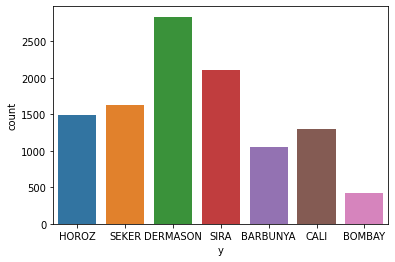

In [7]:
print(train_df['y'].value_counts())
sns.countplot(x='y', data=train_df)

* Imbalanced data

array([[<AxesSubplot:title={'center':'Area'}>,
        <AxesSubplot:title={'center':'Perimeter'}>,
        <AxesSubplot:title={'center':'MajorAxisLength'}>,
        <AxesSubplot:title={'center':'MinorAxisLength'}>],
       [<AxesSubplot:title={'center':'AspectRation'}>,
        <AxesSubplot:title={'center':'Eccentricity'}>,
        <AxesSubplot:title={'center':'ConvexArea'}>,
        <AxesSubplot:title={'center':'EquivDiameter'}>],
       [<AxesSubplot:title={'center':'Extent'}>,
        <AxesSubplot:title={'center':'Solidity'}>,
        <AxesSubplot:title={'center':'roundness'}>,
        <AxesSubplot:title={'center':'Compactness'}>],
       [<AxesSubplot:title={'center':'ShapeFactor1'}>,
        <AxesSubplot:title={'center':'ShapeFactor2'}>,
        <AxesSubplot:title={'center':'ShapeFactor3'}>,
        <AxesSubplot:title={'center':'ShapeFactor4'}>]], dtype=object)

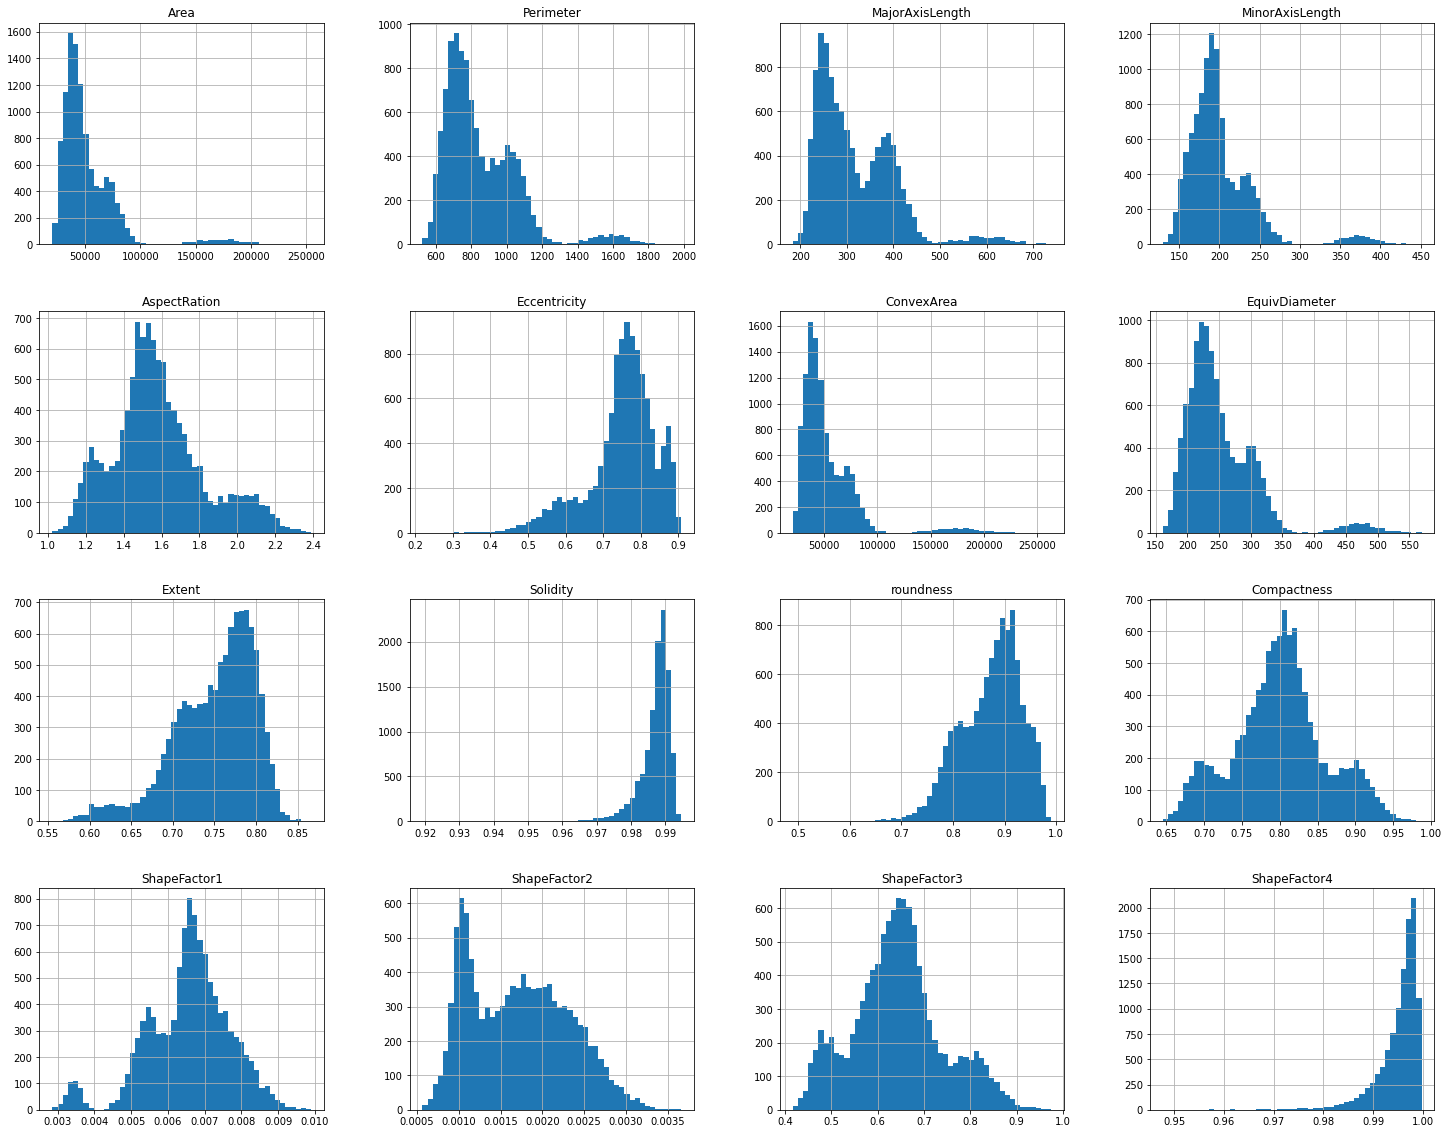

In [8]:
train_df.drop(['ID','y'], axis=1).hist(layout=(4,4), figsize=(25,20),bins=50)

* Skewness existence
* outliers

In [9]:
skewed_features = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
                  'Solidity', 'roundness','ShapeFactor4']

In [10]:
other_features =['AspectRation', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3']

# Data preprocessing

In [11]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [12]:
old_skew = train_df[skewed_features].skew().sort_values(ascending=False)

In [13]:
def cubeTrans(feature):   # function to apply transformer and check the distribution with histogram and kdeplot
    
    logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(lambda x: x**3), [feature])])

    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title("Distribution before Transformation", fontsize=15)
    sns.histplot(train_df[feature], kde=True, color="red")
    plt.subplot(1,2,2)
    
    df_cube = pd.DataFrame(logTr.fit_transform(train_df))
    plt.title("Distribution after Transformation", fontsize=15)
    sns.histplot(df_cube,bins=20, kde=True , legend=False)
    plt.xlabel(feature)
    plt.show()
    
    print(f"Skewness was {round(old_skew[feature],2)} before & is {round(df_cube.skew()[0],2)} after cube transformation.")
    
#cubeTrans(feature="Area")

In [14]:
def logTrans(feature):   # function to apply transformer and check the distribution with histogram and kdeplot
    
    logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.log1p), [feature])])

    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title("Distribution before Transformation", fontsize=15)
    sns.histplot(train_df[feature], kde=True, color="red")
    plt.subplot(1,2,2)
    
    df_log = pd.DataFrame(logTr.fit_transform(train_df))
    plt.title("Distribution after Transformation", fontsize=15)
    sns.histplot(df_log,bins=20, kde=True , legend=False)
    plt.xlabel(feature)
    plt.show()
    
    print(f"Skewness was {round(old_skew[feature],2)} before & is {round(df_log.skew()[0],2)} after Log transformation.")
    
#logTrans(feature="Area")

In [15]:
def squareTrans(feature):   # function to apply transformer and check the distribution with histogram and kdeplot
    
    logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.square), [feature])])

    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title("Distribution before Transformation", fontsize=15)
    sns.histplot(train_df[feature], kde=True, color="red")
    plt.subplot(1,2,2)
    
    df_square = pd.DataFrame(logTr.fit_transform(train_df))
    plt.title("Distribution after Transformation", fontsize=15)
    sns.histplot(df_square,bins=20, kde=True , legend=False)
    plt.xlabel(feature)
    plt.show()

    print(f"Skewness was {round(old_skew[feature],2)} before & is {round(df_square.skew()[0],2)} after Square transformation.")
    
#squareTrans(feature="Area")

In [16]:
def boxcoxtrans(feature):   # function to apply transformer and check the distribution with histogram and kdeplot
    
    boxcoxTr = PowerTransformer(method = "box-cox", standardize=True)

    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title("Distribution before Transformation", fontsize=15)
    sns.histplot(train_df[feature], kde=True, color="red")
    plt.subplot(1,2,2)
    
    df_boxcox = pd.DataFrame(boxcoxTr.fit_transform(train_df[feature].values.reshape(-1,1)))
    plt.title("Distribution after Transformation", fontsize=15)
    sns.histplot(df_boxcox,bins=20, kde=True , legend=False)
    plt.xlabel(feature)
    plt.show()
    
    print(f"Skewness was {round(old_skew[feature],2)} before & is {round(df_boxcox.skew()[0],2)} after Box-cox transformation.")

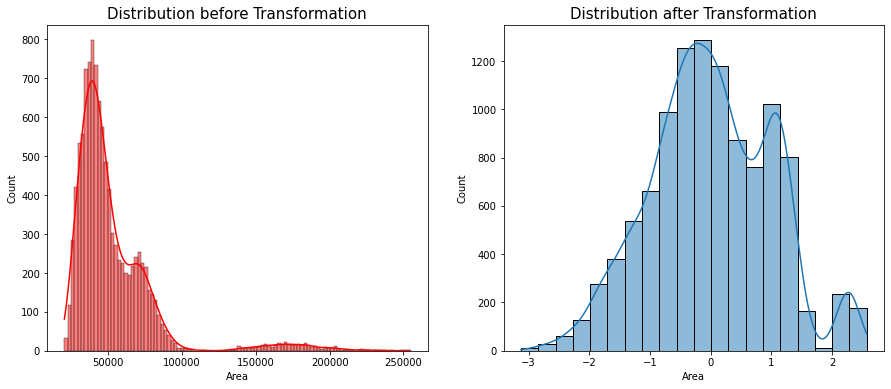

Skewness was 2.97 before & is 0.03 after Box-cox transformation.


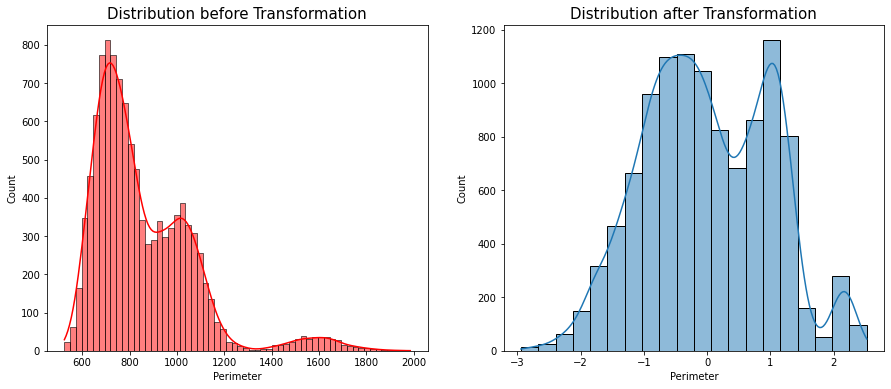

Skewness was 1.65 before & is 0.06 after Box-cox transformation.


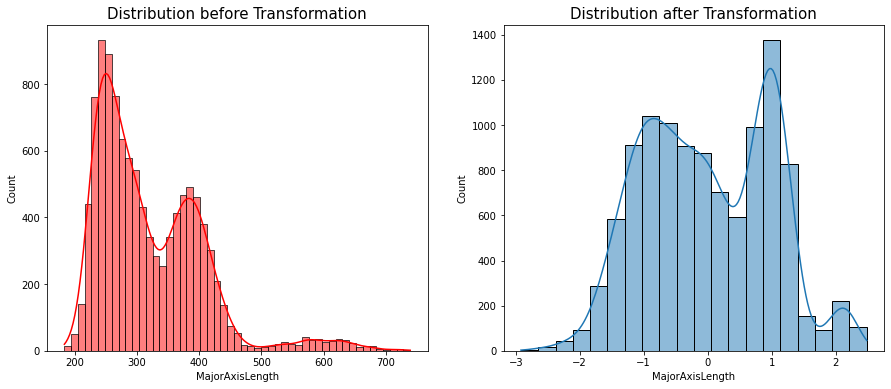

Skewness was 1.39 before & is 0.08 after Box-cox transformation.


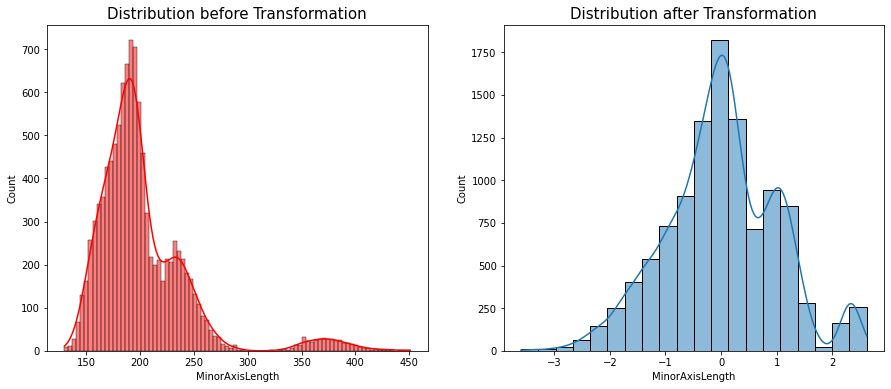

Skewness was 2.25 before & is -0.0 after Box-cox transformation.


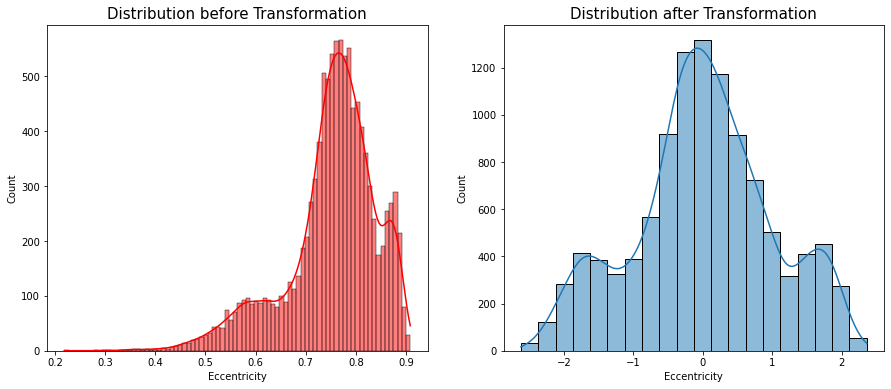

Skewness was -1.08 before & is -0.09 after Box-cox transformation.


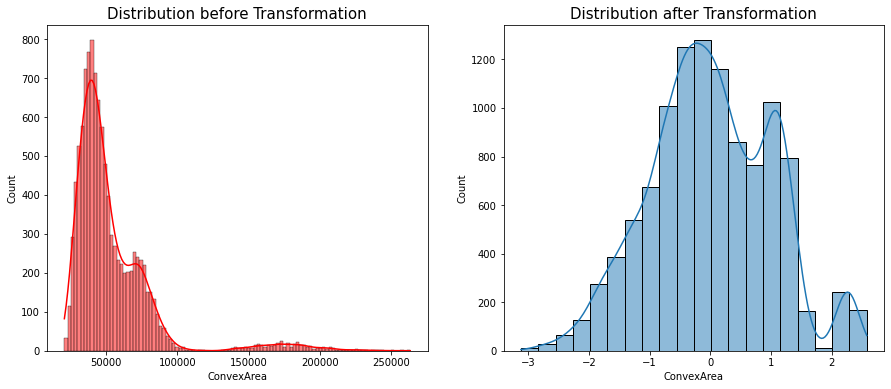

Skewness was 2.96 before & is 0.03 after Box-cox transformation.


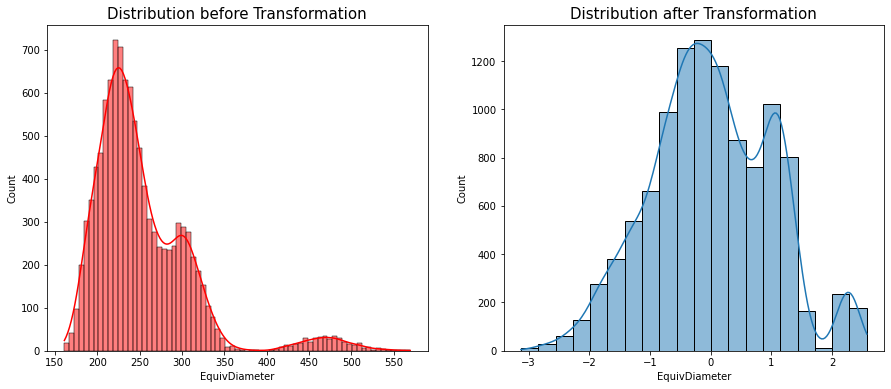

Skewness was 1.97 before & is 0.03 after Box-cox transformation.


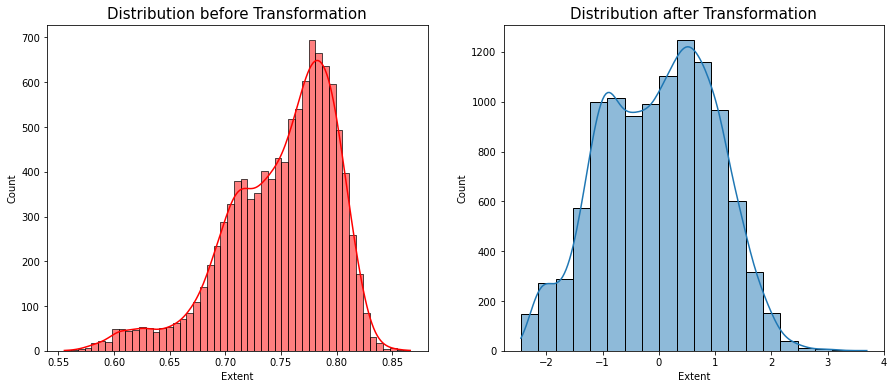

Skewness was -0.9 before & is -0.1 after Box-cox transformation.


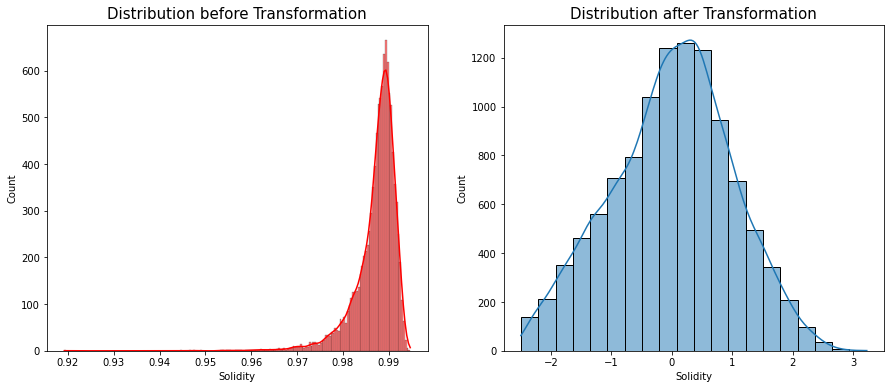

Skewness was -2.51 before & is -0.13 after Box-cox transformation.


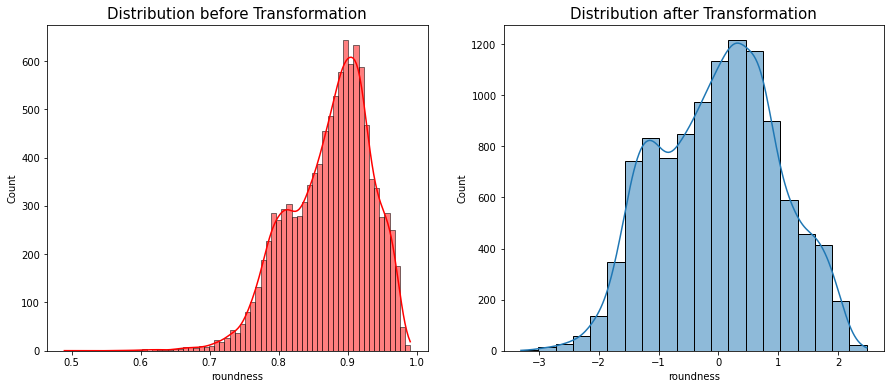

Skewness was -0.66 before & is -0.07 after Box-cox transformation.


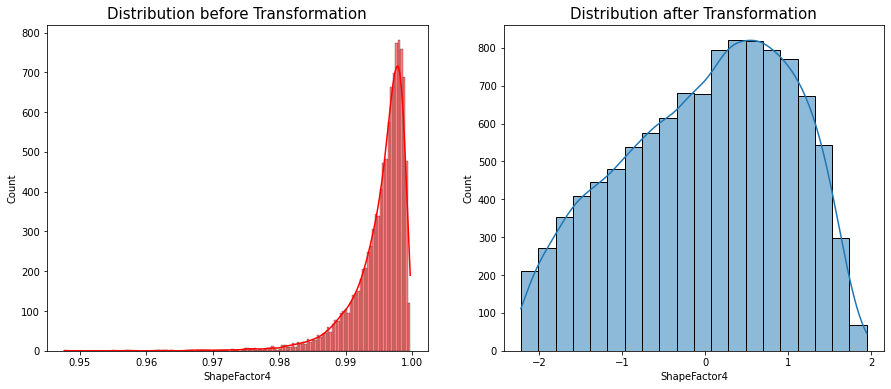

Skewness was -2.63 before & is -0.3 after Box-cox transformation.


In [17]:
for i in skewed_features:
    boxcoxtrans(i)

In [18]:
boxcoxTr = PowerTransformer(method = "box-cox", standardize=True)
transformer1 = boxcoxTr.fit(train_df[skewed_features])
train_df[skewed_features] = transformer1.transform(train_df[skewed_features])
test_df[skewed_features] = transformer1.transform(test_df[skewed_features])

#transformer2 = RobustScaler()
transformer2 = StandardScaler()
train_df[other_features] = transformer2.fit_transform(train_df[other_features])
test_df[other_features] = transformer2.transform(test_df[other_features])

train_df.head()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,0,0.639572,0.818017,1.059364,-0.186576,2.224308,1.853425,0.638133,0.639572,-2.156964,-0.192988,-1.539860,-1.873127,0.231513,-1.328445,-1.772230,1.203425,HOROZ
1,1,-0.041073,-0.319273,-0.581787,0.588731,-1.391835,-1.614147,-0.059443,-0.041073,0.351165,2.812014,2.055287,1.570313,-0.526343,1.109856,1.621877,0.547729,SEKER
2,2,-1.151854,-1.211472,-1.130599,-0.934769,-0.642144,-0.608038,-1.152173,-1.151854,1.195283,0.090865,1.010616,0.599206,0.902962,0.970037,0.573092,0.730095,DERMASON
3,3,-0.453705,-0.495178,-0.527706,-0.289026,-0.502811,-0.435944,-0.457169,-0.453705,0.209378,0.311062,0.457643,0.448979,0.322302,0.483610,0.417275,1.615147,DERMASON
4,4,-0.172339,-0.195041,-0.300305,0.021926,-0.515832,-0.451781,-0.174349,-0.172339,-0.588429,0.103604,0.157444,0.445159,0.046731,0.328421,0.413335,0.162312,SIRA


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

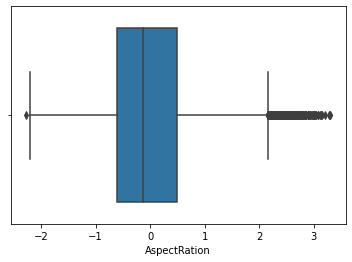

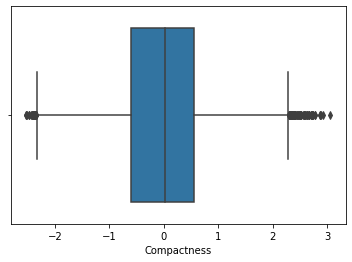

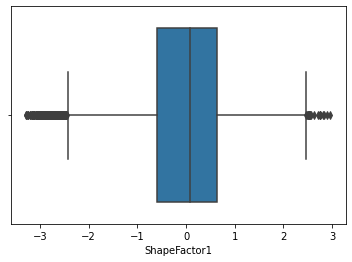

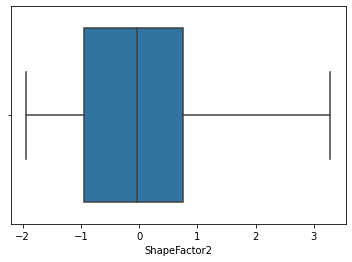

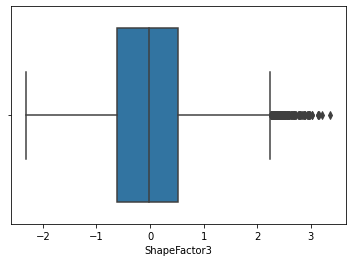

In [19]:
# Box Plot
import seaborn as sns
for i in other_features:
    plt.figure()
    sns.boxplot(train_df[i])

In [20]:
outliers=[]
for feature in train_df.drop(["ID","y"],axis=1).columns:
    Q1 = np.percentile(train_df[feature], 25,
                   interpolation = 'midpoint')
    Q3 = np.percentile(train_df[feature], 75,
                   interpolation = 'midpoint')
    IQR = Q3 - Q1
    
    # Upper bound
    upper = np.where(train_df[feature] >= (Q3+1.5*IQR))
    # Lower bound
    lower = np.where(train_df[feature] <= (Q1-1.5*IQR))
    
    #print(upper[0])
    outliers.extend(upper[0])
    outliers.extend(lower[0])
    ''' Removing the Outliers '''
    #train_df.drop(upper[0], inplace = True)
    #train_df.drop(lower[0], inplace = True)

outliers = list(dict.fromkeys(outliers))
train_df.drop(outliers, inplace = True)

In [21]:
train_df.shape

(9780, 18)

In [22]:
X = train_df.drop(["y","ID"], axis=1)
Y = train_df['y']

In [23]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=12)
X_sm, Y_sm = sm.fit_resample(X,Y)

# Optimizing hyperparameters

In [24]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

In [25]:
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
max_features = ['auto', 'sqrt', 'log2']
min_samples_split = randint(2, 20)
min_samples_leaf = randint(1, 15)

rf_params = dict(n_estimators = n_estimators, max_depth = max_depth, max_features=max_features,
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

In [26]:
#bestF.best_params_

In [27]:
xgb_param = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
             "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
             "min_child_weight" : [ 1, 3, 5, 7 ],
             "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
             "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

In [28]:
lgb_params = {
    'boosting_type': ['gbdt', 'dart'],
    'n_estimators': np.arange(100, 1001, 100),
    'max_depth': np.arange(1, 10, 2),
    'min_child_weight': np.arange(0, 1, 0.25),
    'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.3]
}


In [29]:
cbc = CatBoostClassifier(loss_function= 'MultiClass',eval_metric='Accuracy', verbose=False, task_type='CPU',random_state=42)


params = { 'learning_rate':[0.0301,0.03001,0.030001], 
          'border_count':[10,100,200],
         'depth': [2,4],
         'l2_leaf_reg': [10,20],
          'bagging_temperature':[0.3,0.9],
          'iterations':[1000,2000,2225,3000]}


#Grid_CBC = GridSearchCV(estimator=cbc, param_grid = params, cv = 3,refit=True, n_jobs=-1)
#Grid_CBC.fit(X_train, y_train)


# Training

**knn**

In [30]:
from sklearn.neighbors import KNeighborsClassifier

#pca_rfsm = PCA(n_components=6).fit_transform(X_sm)
#kn_model = KNeighborsClassifier(algorithm='auto', weights ='distance', n_neighbors=5)
#training_model_metrics(kn_model,pca_rfsm,Y_sm,"knn")

**Random forest**

In [31]:
#n_estimators=100, max_depth= 15,min_samples_leaf = 1, min_samples_split= 2,criterion = 'entropy'
#rf = RandomForestClassifier(random_state=12)
#optimize_params(rf,rf_params,X_sm, Y_sm)

In [32]:
#rf_optimized = RandomForestClassifier(random_state=12,max_depth= 15, max_features= 'log2', min_samples_leaf= 2, min_samples_split= 6,n_estimators=50)
#training_model_metrics(rf_optimized,X_sm,Y_sm,"rf")

In [33]:
#from sklearn.decomposition import PCA
#pca_rfsm = PCA(n_components=13).fit_transform(X_sm)

#training_model_metrics(rf_optimized, pca_rfsm, Y_sm,"rf")

**XGBOOST**

In [34]:
#xgb_model = xgb.XGBClassifier(random_state=12,objective='multi:softmax')
#optimize_params(xgb_model,xgb_param,X_sm, Y_sm,"XGB")

In [35]:
#xgb_optimized = xgb.XGBClassifier(random_state=12,objective='multi:softproba',min_child_weight= 3, max_depth= 6, learning_rate= 0.1, gamma= 0.2, colsample_bytree= 0.7)
#training_model_metrics(xgb_optimized, X_sm, Y_sm,"XGB")

In [36]:
#pca_rfsm = PCA(n_components=14).fit_transform(X_sm)

#training_model_metrics(xgb_optimized, pca_rfsm, Y_sm,"XGB")

**CATBOOST**

In [37]:
#cbc=CatBoostClassifier(learning_rate=0.05, depth=5 , l2_leaf_reg=10, loss_function= 'MultiClass', eval_metric='Accuracy',
    #                   verbose=False, task_type='CPU', random_state=12, bagging_temperature=0.9, random_strength= 10)
#cbc.fit(X_train, y_train)
#training_model_metrics(cbc,X_sm,Y_sm,"cb")
#cbc.fit(X_sm,Y_sm)

In [38]:
##pca_rfsm = PCA(n_components=14).fit_transform(X_sm)
#training_model_metrics(cbc,pca_rfsm,Y_sm,"cb")

**LGB**

In [39]:
#lgb_model = LGBMClassifier(objective='multiclass', random_state=12)
#optimize_params(lgb_model,lgb_params,X_sm, Y_sm,"LGB")

In [40]:
#'boosting_type': ['gbdt', 'dart'],
    #'n_estimators': np.arange(100, 1001, 100),
    #'max_depth': np.arange(1, 10, 2),
   # 'min_child_weight': np.arange(0, 1, 0.25),
   # 'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.3]
        
        
#lgb_model = LGBMClassifier(objective='multiclass', random_state=12, boosting_type ='gbdt', learning_rate=0.1, n_estimators= 50,max_depth=5,min_child_weight=3)
#training_model_metrics(lgb_model,X_sm,Y_sm,"LGB")

In [41]:
#lgb_model = LGBMClassifier(objective='multiclass', random_state=42, learning_rate=0.03, reg_alpha=0.0001)
#lgb_model.fit(X_sm, Y_sm)
#predictions_LGB = lgb_model.predict(X_test)

#print('Mean_F1_score', f1_score(y_test, predictions_LGB, average='micro'))
#print("Classification Report: \n", classification_report(y_test, predictions_LGB))
#print(lgb_model.score(X_test,y_test))

In [42]:
#pca_rfsm = PCA(n_components=14).fit_transform(X_sm)

#training_model_metrics(lgb_model, pca_rfsm, Y_sm,"lgb")

In [43]:
#clf_linear = svm.SVC(kernel='linear')
#training_model_metrics(clf_linear, X_sm, Y_sm,"lgb")

In [44]:
#clf_poly = svm.SVC(kernel='poly',degree=3)
#training_model_metrics(clf_poly, X_sm, Y_sm,"lgb")

In [45]:
clf_rbf = svm.SVC(kernel='rbf',C=2,gamma=0.1)
training_model_metrics(clf_rbf, X_sm, Y_sm,"svm")

Classification Report: 
               precision    recall  f1-score   support

    BARBUNYA       0.97      0.95      0.96       571
      BOMBAY       1.00      1.00      1.00       532
        CALI       0.96      0.95      0.96       559
    DERMASON       0.91      0.90      0.90       562
       HOROZ       0.96      0.95      0.95       543
       SEKER       0.96      0.97      0.97       569
        SIRA       0.85      0.88      0.87       530

    accuracy                           0.94      3866
   macro avg       0.94      0.94      0.94      3866
weighted avg       0.94      0.94      0.94      3866

Test_acc:  0.9430936368339369
Train_acc:  0.9516202056788048


In [46]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

#estimators = [
    # ('rf', rf_optimized),
     #('lgb',make_pipeline(StandardScaler(),lgb_model)),
     #('xg',xgb_optimized),
     #('cbc',cbc),
    #('svc',make_pipeline(StandardScaler(),clf_rbf)),
    #('ada',make_pipeline(StandardScaler(),ada)),
   #  ('knn',kn_model)]
      


In [47]:
#model = StackingClassifier(estimators=estimators,final_estimator=LogisticRegression(), cv=3)
#model.fit(pca_rfsm, Y_sm)
#training_model_metrics(model, pca_rfsm, Y_sm,"stacking")

In [48]:
#from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.ensemble import VotingClassifier

#clf3 = GradientBoostingClassifier(n_estimators=200)

#model2 = VotingClassifier(estimators=estimators, voting='hard')
#training_model_metrics(model2, pca_rfsm, Y_sm,"voting")

In [49]:

#ada = AdaBoostClassifier(base_estimator = RandomForestClassifier(max_depth = 10, n_estimators = 100, random_state = 42),
 #                        n_estimators = 20, learning_rate = 0.1, random_state = 42)

#training_model_metrics(ada, X_sm, Y_sm,"ada")

In [50]:
#label_encoder = LabelEncoder()
#label_encoder = label_encoder.fit(Y_sm)
#label_encoded_y = label_encoder.transform(Y_sm)
#X_train, X_test, y_train, y_test = train_test_split(X, label_encoded_y, test_size=0.2, random_state=12, shuffle=True)
#lgb_model = LGBMClassifier(objective='multiclass', random_state=12, boosting_type ='gbdt', learning_rate=0.1, n_estimators= 50,max_depth=5,min_child_weight=3)
##lgb_model.fit(X_sm,Y_sm)
#pd.DataFrame(lgb_model.predict(test_df.drop("ID",axis=1))).value_counts()


In [51]:
#pd.DataFrame(model.predict(pca_2)).value_counts()

In [52]:
#pca = PCA(n_components=14).fit_transform(X_sm)
#pca_2 = PCA(n_components=14).fit(X_sm).transform((test_df.drop("ID",axis=1)))
#model.fit(pca,Y_sm)


In [53]:
#pd.DataFrame(model2.predict(test_df.drop("ID",axis=1))).value_counts()

In [54]:
clf_rbf.fit(X_sm, Y_sm)
ypred = clf_rbf.predict(test_df.drop(["ID"],axis =1))
pd.DataFrame(ypred).value_counts()

DERMASON    704
SIRA        532
SEKER       413
HOROZ       367
CALI        317
BARBUNYA    272
BOMBAY      104
dtype: int64

# predict

In [55]:
y_test_predicted = clf_rbf.predict(test_df.drop(["ID"],axis =1))

# add y column to the test data
test_df['y'] = y_test_predicted

In [56]:
test_df[['ID', 'y']].to_csv('/kaggle/working/submission.csv', index=False)
#df = pd.read_csv('/kaggle/working/submission.csv')
#df["y"].value_counts()